In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
%matplotlib inline
from scipy.special import boxcox1p
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [48]:
df_train=pd.read_csv("train_fwYjLYX.csv")
df_test=pd.read_csv("test_1eLl9Yf.csv")
print(df_train.shape)
print(df_train.isnull().sum())
print(df_train.head())
print(df_train['segment'].unique())
print(df_train['zone'].unique())
print(df_train['state'].unique())

(80402, 6)
application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64
  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
[1 2]
['EAST' 'NORTH' 'SOUTH' 'WEST' 'CENTRAL' nan]
['WEST BENGAL' 'DELHI' 'KARNATAKA' 'TAMIL NADU' 'UTTAR PRADESH' 'PUNJAB'
 'TELANGANA' 'ANDHRA PRADESH' 'MAHARASHTRA' 'ORISSA' 'GUJARAT' 'ASSAM'
 'JHARKHAND' 'UTTARAKHAND' 'KERALA' 'CHHATTISGARH' 'BIHAR' 'TRIPURA'
 'MADHYA PRADESH' 'HARYANA']


In [49]:
df_train.info()
print(df_train.loc[df_train['segment']==1].count())
print(df_train.loc[df_train['segment']==2].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB
application_date    66898
segment             66898
branch_id           66898
state               66898
zone                66898
case_count          66898
dtype: int64
application_date    13504
segment             13504
branch_id               0
state               13504
zone                    0
case_count          13504
dtype: int64


In [50]:
df_seg_1=df_train.loc[df_train['segment']==1]
df_seg_2=df_train.loc[df_train['segment']==2]
df_seg_1_test=df_test.loc[df_train['segment']==1]
df_seg_2_test=df_test.loc[df_train['segment']==2]

In [51]:
#Stationarity Test
def test_stationarity(timeseries,cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

In [52]:
#Calculation of Root Mean Square Error
def measure_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [53]:
#Calculating log transformation
def calculate_log(ts):
    for i in range(0,len(ts)):
        ts[i]=np.log(ts[i]+1)        
    return ts

In [79]:
#ARIMA fitting value forecast
def model_arima_seg2(ts):
    model = auto_arima(ts,trace=True,error_action='ignore', suppress_warnings=True)
    model.order
    model_ARIMA = ARIMA(ts, order=model.order)  
    results_ARIMA = model_ARIMA.fit(disp=-1)
    val=results_ARIMA.predict(start=pd.to_datetime('2019-07-24'),end=pd.to_datetime('2019-10-24'))
    return val

In [80]:
#ARIMA fitting value forecast
def model_arima_seg1(ts):
    model = auto_arima(ts,trace=True,error_action='ignore', suppress_warnings=True)
    model.order
    model_ARIMA = ARIMA(ts, order=model.order)  
    results_ARIMA = model_ARIMA.fit(disp=0)
    val=results_ARIMA.predict(start=pd.to_datetime('2019-07-06'),end=pd.to_datetime('2019-09-30'))
    return val

In [56]:
df_seg_1.application_date=pd.to_datetime(df_seg_1.application_date,format="%Y-%m-%d")
print(df_seg_1.info())
df_seg_2.application_date=pd.to_datetime(df_seg_2.application_date,format="%Y-%m-%d")
print(df_seg_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66898 entries, 0 to 66897
Data columns (total 6 columns):
application_date    66898 non-null datetime64[ns]
segment             66898 non-null int64
branch_id           66898 non-null float64
state               66898 non-null object
zone                66898 non-null object
case_count          66898 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13504 entries, 66898 to 80401
Data columns (total 6 columns):
application_date    13504 non-null datetime64[ns]
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                0 non-null object
case_count          13504 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 738.5+ KB
None


C:\Users\HP\Miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
# Handling Segment 1 data
df_seg_1['branch_id'].unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.])

In [58]:
df_bran=df_seg_1[['application_date','branch_id','case_count']]

In [59]:
df_bran_1=df_bran[['application_date','case_count']].loc[df_bran['branch_id']==1]

In [60]:
df_bran_1

,application_date,case_count
0,2017-04-01,40.0
1,2017-04-03,5.0
2,2017-04-04,4.0
3,2017-04-05,113.0
4,2017-04-07,76.0
...,...,...
801,2019-07-01,169.0
802,2019-07-02,139.0
803,2019-07-03,165.0
804,2019-07-04,169.0


In [61]:
df_bran_1['weekday'] = df_bran_1['application_date'].dt.weekday
df_bran_1['year'] = df_bran_1['application_date'].dt.year
df_bran_1['month'] = df_bran_1['application_date'].dt.month
df_bran_1['day'] = df_bran_1['application_date'].dt.day

In [62]:
df_bran_1

,application_date,case_count,weekday,year,month,day
0,2017-04-01,40.0,5,2017,4,1
1,2017-04-03,5.0,0,2017,4,3
2,2017-04-04,4.0,1,2017,4,4
3,2017-04-05,113.0,2,2017,4,5
4,2017-04-07,76.0,4,2017,4,7
...,...,...,...,...,...,...
801,2019-07-01,169.0,0,2019,7,1
802,2019-07-02,139.0,1,2019,7,2
803,2019-07-03,165.0,2,2019,7,3
804,2019-07-04,169.0,3,2019,7,4


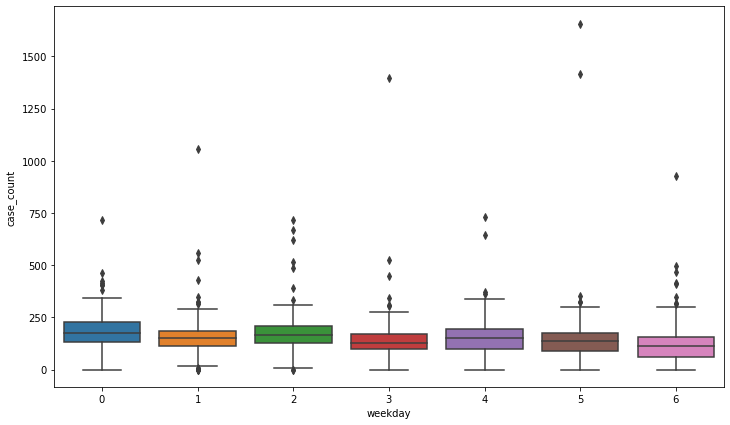

In [63]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.boxplot(x="weekday", y="case_count", data=df_bran_1)

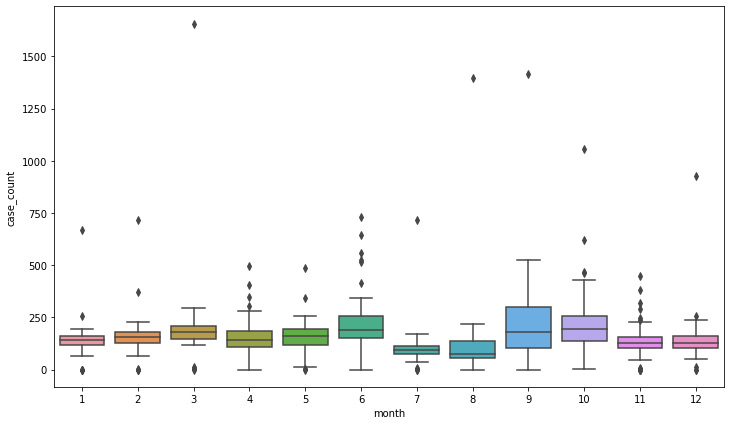

In [64]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_1)

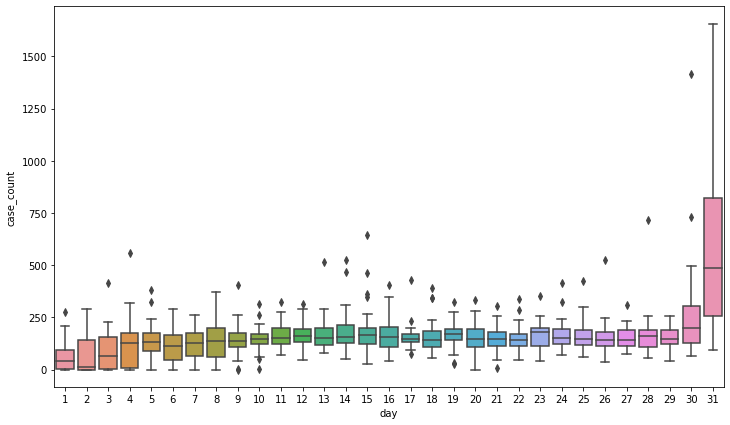

In [65]:
plt.figure(figsize=(12,7))
sns.boxplot(x="day", y="case_count", data=df_bran_1)

In [66]:
df_bran_all=df_bran[['application_date','case_count','branch_id']]
df_bran_all['weekday'] = df_bran_all['application_date'].dt.weekday
df_bran_all['year'] = df_bran_all['application_date'].dt.year
df_bran_all['month'] = df_bran_all['application_date'].dt.month
df_bran_all['day'] = df_bran_all['application_date'].dt.day

C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

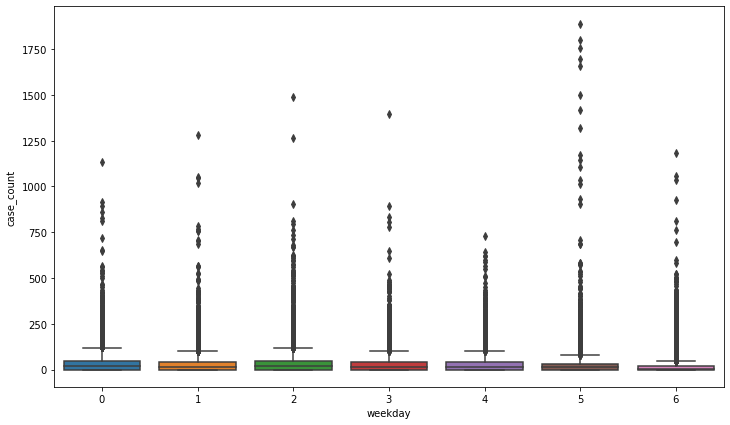

In [67]:
plt.figure(figsize=(12,7))
sns.boxplot(x="weekday", y="case_count", data=df_bran_all)

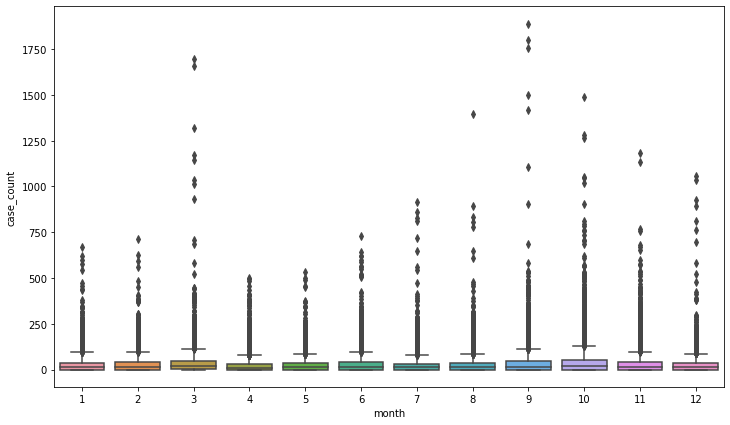

In [68]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_all)

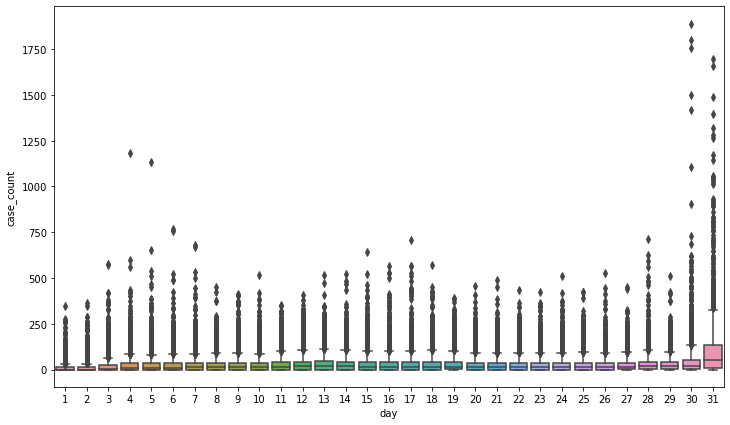

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(x="day", y="case_count", data=df_bran_all)

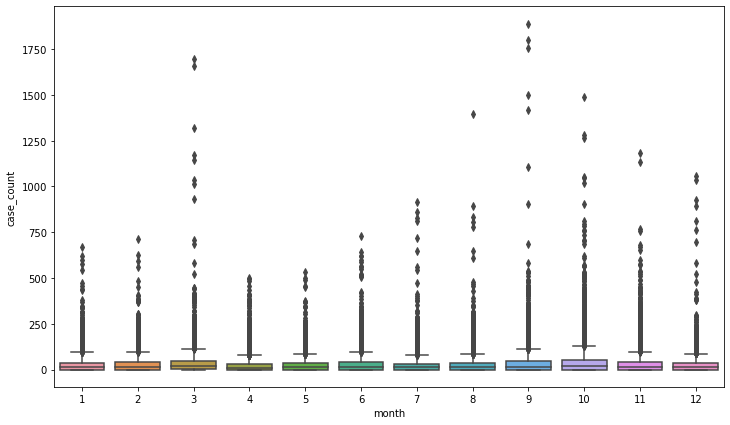

In [70]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_all);

In [71]:
df_seg_1_piv=df_seg_1.pivot_table('case_count',index='application_date',columns='branch_id')

In [72]:
df_seg_1_piv

branch_id,1.0,3.0,5.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,...,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0
application_date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,40.0,58.0,10.0,2.0,13.0,11.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-03,5.0,13.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-04,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-05,113.0,74.0,113.0,19.0,10.0,22.0,46.0,23.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-07,76.0,74.0,102.0,24.0,28.0,27.0,29.0,22.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,169.0,266.0,264.0,52.0,45.0,35.0,30.0,40.0,54.0,70.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,30.0,6.0
2019-07-02,139.0,220.0,164.0,87.0,33.0,34.0,53.0,47.0,50.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,17.0,3.0
2019-07-03,165.0,277.0,195.0,50.0,40.0,37.0,75.0,44.0,55.0,49.0,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,34.0,3.0


In [93]:
df_seg1_ts=pd.DataFrame(index=pd.date_range('2019-07-06','2019-09-30'))

In [94]:
#ARIMA fitting value forecast
def model_arima_seg_1(ts):
    model = auto_arima(ts, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    model.fit(ts)
    val=model.predict(n_periods=87)
    return val

In [122]:
#ARIMA fitting value forecast
def model_arima_seg_2(ts):
    model = auto_arima(ts, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    model.fit(ts)
    val=model.predict(n_periods=93)
    return val

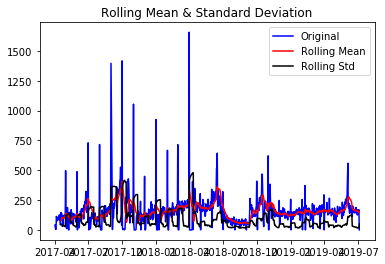

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.283324e+00
p-value                        4.458757e-13
#Lags Used                     5.000000e+00
Number of Observations Used    8.000000e+02
Critical Value (1%)           -3.438551e+00
Critical Value (5%)           -2.865160e+00
Critical Value (10%)          -2.568697e+00
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10188.151, BIC=10197.535, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10164.911, BIC=10178.987, Fit time=0.099 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=10168.968, BIC=10183.044, Fit time=0.430 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10897.449, BIC=10902.141, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10159.601, BIC=10178.369, Fit time=0.267 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0

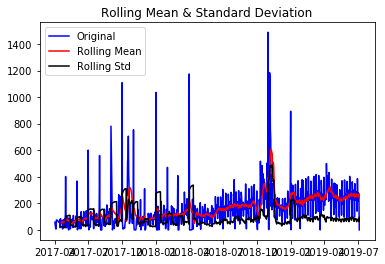

Results of Dickey-Fuller Test:
p-value = 0.0453. The series is likely non-stationary.
Test Statistic                  -2.900598
p-value                          0.045278
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10577.952, BIC=10587.334, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10381.741, BIC=10395.814, Fit time=0.158 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=10159.752, BIC=10173.825, Fit time=0.385 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10575.953, BIC=10580.643, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=10157.419, BIC=10176.183, Fit time=0.845 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

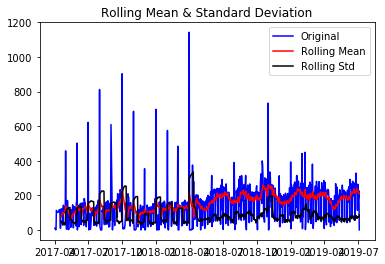

Results of Dickey-Fuller Test:
p-value = 0.1096. The series is likely non-stationary.
Test Statistic                  -2.524638
p-value                          0.109594
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10313.154, BIC=10322.536, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10108.651, BIC=10122.724, Fit time=0.132 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=9783.262, BIC=9797.334, Fit time=0.478 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10311.155, BIC=10315.846, Fit time=0.022 seconds
Fit ARIMA: or

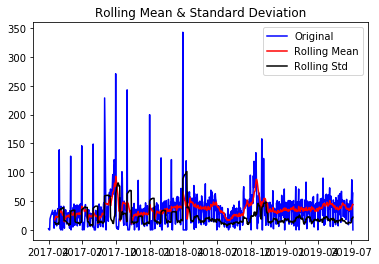

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.200865
p-value                          0.000009
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8162.503, BIC=8171.885, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7970.103, BIC=7984.175, Fit time=0.257 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7709.624, BIC=7723.697, Fit time=0.346 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8160.503, BIC=8165.194, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7708.260, BIC=7727.023, Fit time=0.553 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7710.260, BIC=

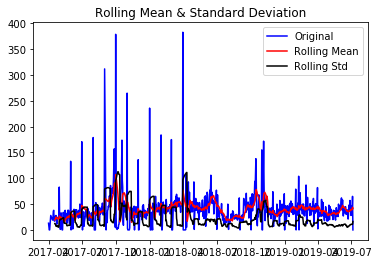

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.995239
p-value                          0.000023
#Lags Used                      14.000000
Number of Observations Used    791.000000
Critical Value (1%)             -3.438644
Critical Value (5%)             -2.865201
Critical Value (10%)            -2.568719
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7935.461, BIC=7944.846, Fit time=0.030 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7914.846, BIC=7928.922, Fit time=0.211 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=7917.183, BIC=7931.260, Fit time=0.413 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8654.261, BIC=8658.953, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7914.753, BIC=7933.522, Fit time=0.251 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7915.177, BIC=

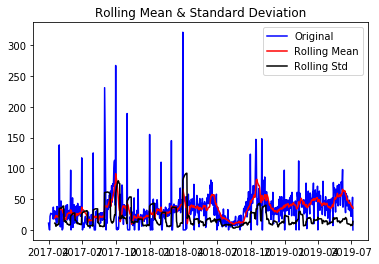

Results of Dickey-Fuller Test:
p-value = 0.0004. The series is likely stationary.
Test Statistic                  -4.297903
p-value                          0.000448
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7954.326, BIC=7963.708, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7756.389, BIC=7770.462, Fit time=0.277 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7528.879, BIC=7542.951, Fit time=0.258 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7952.327, BIC=7957.017, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7528.323, BIC=7547.087, Fit time=0.558 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7530.253, BIC=

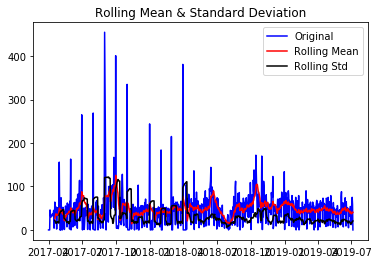

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.355824
p-value                          0.000004
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8269.600, BIC=8278.984, Fit time=0.033 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8264.719, BIC=8278.795, Fit time=0.170 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=8265.482, BIC=8279.559, Fit time=0.546 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8976.856, BIC=8981.548, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8263.533, BIC=8282.301, Fit time=0.253 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8263.366, BIC=

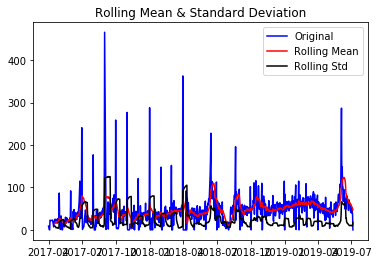

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.809116e+00
p-value                        2.138703e-09
#Lags Used                     6.000000e+00
Number of Observations Used    7.990000e+02
Critical Value (1%)           -3.438561e+00
Critical Value (5%)           -2.865164e+00
Critical Value (10%)          -2.568700e+00
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8474.420, BIC=8483.802, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8273.308, BIC=8287.381, Fit time=0.259 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8062.303, BIC=8076.376, Fit time=0.331 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8472.420, BIC=8477.111, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8062.363, BIC=8081.126, Fit time=0.561 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=

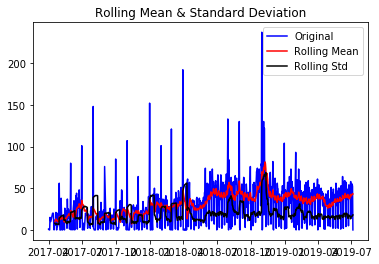

Results of Dickey-Fuller Test:
p-value = 0.1250. The series is likely non-stationary.
Test Statistic                  -2.461987
p-value                          0.124999
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7810.353, BIC=7819.735, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7625.791, BIC=7639.863, Fit time=0.322 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7302.933, BIC=7317.005, Fit time=0.622 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7808.353, BIC=7813.044, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7304.532, BIC=7323.296, Fit time=0.689 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=7304.472, 

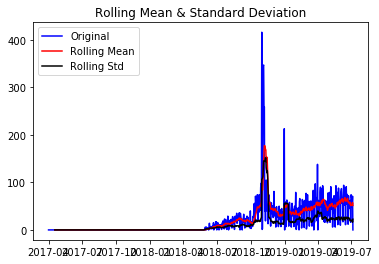

Results of Dickey-Fuller Test:
p-value = 0.2106. The series is likely non-stationary.
Test Statistic                  -2.187975
p-value                          0.210639
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7817.705, BIC=7827.086, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7664.828, BIC=7678.900, Fit time=0.316 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7513.106, BIC=7527.178, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7815.705, BIC=7820.395, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7505.868, BIC=7524.632, Fit time=0.550 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7507.796, 

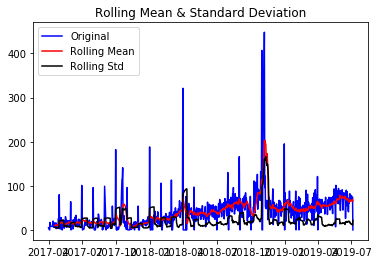

Results of Dickey-Fuller Test:
p-value = 0.0024. The series is likely stationary.
Test Statistic                  -3.854342
p-value                          0.002398
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8246.887, BIC=8256.269, Fit time=0.079 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8073.872, BIC=8087.945, Fit time=0.311 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7952.045, BIC=7966.118, Fit time=0.336 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8244.887, BIC=8249.578, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7933.765, BIC=7952.528, Fit time=0.623 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7923.562, BIC=

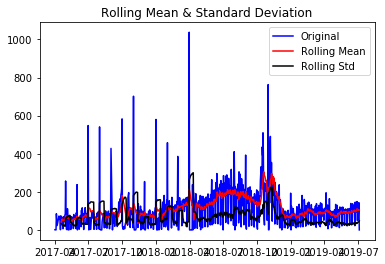

Results of Dickey-Fuller Test:
p-value = 0.1526. The series is likely non-stationary.
Test Statistic                  -2.362521
p-value                          0.152595
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9990.411, BIC=9999.793, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9788.427, BIC=9802.499, Fit time=0.259 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=9514.814, BIC=9528.887, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9988.411, BIC=9993.102, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=9515.888, BIC=9534.651, Fit time=0.598 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=9515.861, 

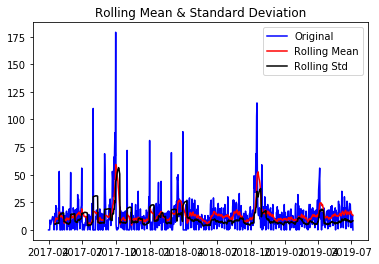

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.312957e+00
p-value                        3.201189e-08
#Lags Used                     1.400000e+01
Number of Observations Used    7.910000e+02
Critical Value (1%)           -3.438644e+00
Critical Value (5%)           -2.865201e+00
Critical Value (10%)          -2.568719e+00
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6610.503, BIC=6619.888, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6511.690, BIC=6525.766, Fit time=0.261 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=6541.325, BIC=6555.401, Fit time=0.581 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7093.376, BIC=7098.068, Fit time=0.033 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6486.581, BIC=6505.349, Fit time=0.646 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=

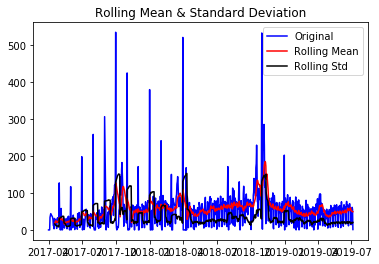

Results of Dickey-Fuller Test:
p-value = 0.0006. The series is likely stationary.
Test Statistic                  -4.211718
p-value                          0.000629
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8983.305, BIC=8992.687, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8822.994, BIC=8837.067, Fit time=0.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8572.498, BIC=8586.571, Fit time=0.362 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8981.305, BIC=8985.996, Fit time=0.037 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8564.741, BIC=8583.504, Fit time=0.619 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8566.335, BIC=

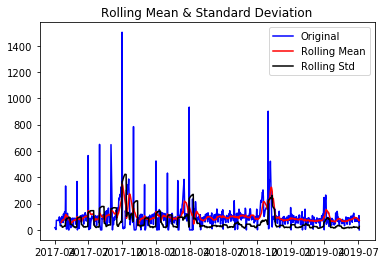

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.216154e+01
p-value                        1.489726e-22
#Lags Used                     2.000000e+00
Number of Observations Used    8.030000e+02
Critical Value (1%)           -3.438520e+00
Critical Value (5%)           -2.865146e+00
Critical Value (10%)          -2.568690e+00
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=9731.495, BIC=9740.879, Fit time=0.042 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=9677.927, BIC=9692.003, Fit time=0.087 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=9689.131, BIC=9703.208, Fit time=0.640 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10314.624, BIC=10319.316, Fit time=0.033 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=9668.075, BIC=9686.844, Fit time=0.223 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AI

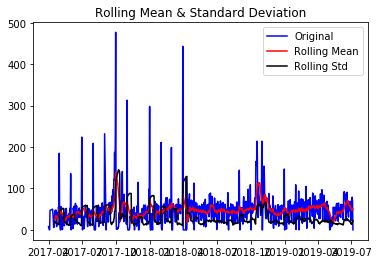

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.706975e+01
p-value                        7.840542e-30
#Lags Used                     1.000000e+00
Number of Observations Used    8.040000e+02
Critical Value (1%)           -3.438510e+00
Critical Value (5%)           -2.865142e+00
Critical Value (10%)          -2.568688e+00
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8248.011, BIC=8257.396, Fit time=0.054 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8220.496, BIC=8234.572, Fit time=0.228 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=8223.834, BIC=8237.910, Fit time=0.431 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8954.964, BIC=8959.656, Fit time=0.019 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8219.999, BIC=8238.767, Fit time=0.269 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=

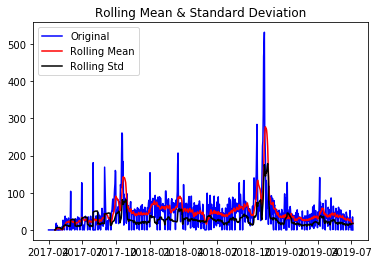

Results of Dickey-Fuller Test:
p-value = 0.0057. The series is likely stationary.
Test Statistic                  -3.605811
p-value                          0.005651
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8156.868, BIC=8166.250, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8066.872, BIC=8080.945, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8035.479, BIC=8049.552, Fit time=0.320 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8154.868, BIC=8159.559, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8007.311, BIC=8026.075, Fit time=0.604 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7990.771, BIC=

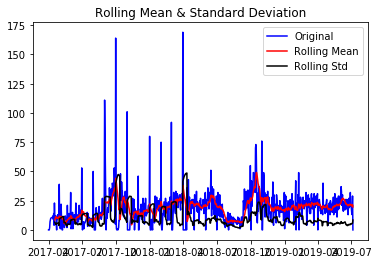

Results of Dickey-Fuller Test:
p-value = 0.0021. The series is likely stationary.
Test Statistic                  -3.888314
p-value                          0.002123
#Lags Used                      14.000000
Number of Observations Used    791.000000
Critical Value (1%)             -3.438644
Critical Value (5%)             -2.865201
Critical Value (10%)            -2.568719
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6964.475, BIC=6973.857, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6758.299, BIC=6772.371, Fit time=0.268 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6516.484, BIC=6530.557, Fit time=0.278 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6962.475, BIC=6967.166, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6517.232, BIC=6535.995, Fit time=0.456 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6517.246, BIC=

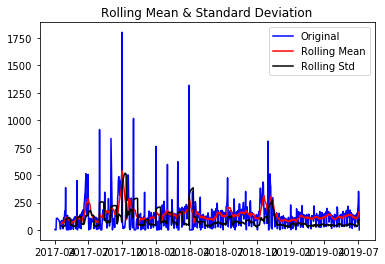

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.641169
p-value                          0.000001
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10169.489, BIC=10178.873, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10113.693, BIC=10127.769, Fit time=0.077 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=10123.625, BIC=10137.701, Fit time=0.556 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10751.953, BIC=10756.645, Fit time=0.019 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10109.405, BIC=10128.174, Fit time=0.172 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1010

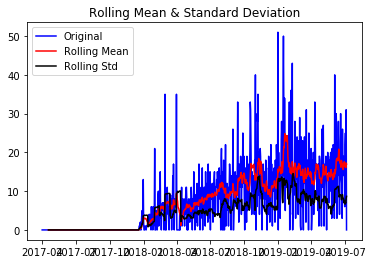

Results of Dickey-Fuller Test:
p-value = 0.7889. The series is likely non-stationary.
Test Statistic                  -0.897305
p-value                          0.788859
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5775.205, BIC=5784.587, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5542.337, BIC=5556.410, Fit time=0.214 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5239.613, BIC=5253.685, Fit time=0.420 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5773.205, BIC=5777.896, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5241.339, BIC=5260.103, Fit time=0.490 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5241.333, 

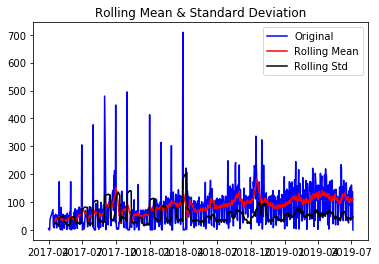

Results of Dickey-Fuller Test:
p-value = 0.0443. The series is likely non-stationary.
Test Statistic                  -2.909511
p-value                          0.044253
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9475.113, BIC=9484.495, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9295.055, BIC=9309.128, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8958.709, BIC=8972.782, Fit time=0.932 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9473.113, BIC=9477.804, Fit time=0.057 seconds
Fit ARIMA: order=(2

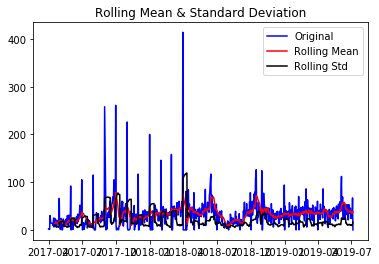

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                  -4.694223
p-value                          0.000086
#Lags Used                      14.000000
Number of Observations Used    791.000000
Critical Value (1%)             -3.438644
Critical Value (5%)             -2.865201
Critical Value (10%)            -2.568719
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8118.809, BIC=8128.191, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7914.605, BIC=7928.678, Fit time=0.283 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7663.434, BIC=7677.506, Fit time=0.391 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8116.809, BIC=8121.500, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7663.023, BIC=7681.786, Fit time=0.632 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7664.835, BIC=

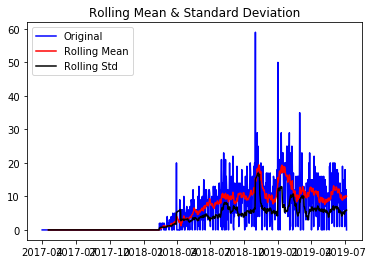

Results of Dickey-Fuller Test:
p-value = 0.5232. The series is likely non-stationary.
Test Statistic                  -1.520844
p-value                          0.523176
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5502.765, BIC=5512.147, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5220.248, BIC=5234.320, Fit time=0.196 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4910.497, BIC=4924.569, Fit time=0.287 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5500.765, BIC=5505.456, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4899.780, BIC=4918.543, Fit time=0.513 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4899.493, 

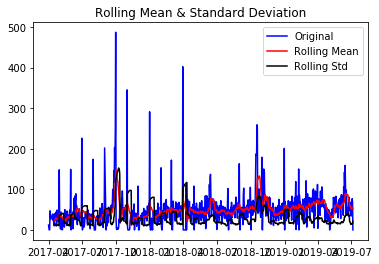

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.242805e+01
p-value                        3.997595e-23
#Lags Used                     2.000000e+00
Number of Observations Used    8.030000e+02
Critical Value (1%)           -3.438520e+00
Critical Value (5%)           -2.865146e+00
Critical Value (10%)          -2.568690e+00
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8609.405, BIC=8618.787, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8432.815, BIC=8446.888, Fit time=0.272 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8265.083, BIC=8279.156, Fit time=0.307 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8607.405, BIC=8612.096, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8235.603, BIC=8254.367, Fit time=1.428 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 1); s

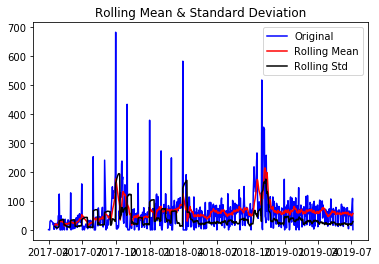

Results of Dickey-Fuller Test:
p-value = 0.0041. The series is likely stationary.
Test Statistic                  -3.700351
p-value                          0.004108
#Lags Used                      18.000000
Number of Observations Used    787.000000
Critical Value (1%)             -3.438686
Critical Value (5%)             -2.865219
Critical Value (10%)            -2.568729
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9128.330, BIC=9137.711, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8974.790, BIC=8988.863, Fit time=0.361 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8775.755, BIC=8789.827, Fit time=0.303 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9126.330, BIC=9131.020, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8756.752, BIC=8775.515, Fit time=0.580 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8758.436, BIC=

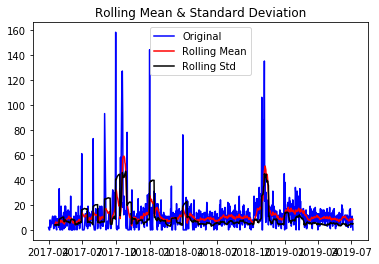

Results of Dickey-Fuller Test:
p-value = 0.0002. The series is likely stationary.
Test Statistic                  -4.561458
p-value                          0.000152
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6681.672, BIC=6691.056, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6573.017, BIC=6587.093, Fit time=0.183 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=6607.384, BIC=6621.460, Fit time=0.512 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7064.028, BIC=7068.720, Fit time=0.024 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6545.573, BIC=6564.341, Fit time=0.514 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6547.195, BIC=

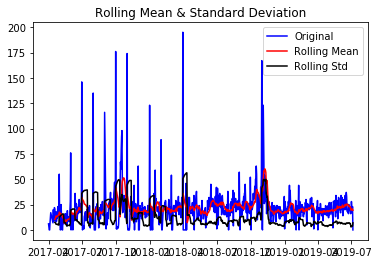

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.836668
p-value                          0.000046
#Lags Used                      15.000000
Number of Observations Used    790.000000
Critical Value (1%)             -3.438655
Critical Value (5%)             -2.865205
Critical Value (10%)            -2.568722
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6995.214, BIC=7004.598, Fit time=0.030 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6970.564, BIC=6984.640, Fit time=0.204 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=6973.058, BIC=6987.134, Fit time=0.436 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7689.524, BIC=7694.216, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6970.766, BIC=6989.535, Fit time=0.223 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=6966.111, BIC=

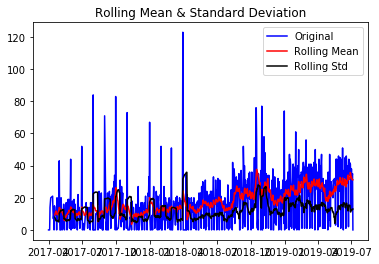

Results of Dickey-Fuller Test:
p-value = 0.3911. The series is likely non-stationary.
Test Statistic                  -1.778639
p-value                          0.391117
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7001.351, BIC=7010.733, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6820.944, BIC=6835.017, Fit time=0.253 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6505.637, BIC=6519.710, Fit time=0.480 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6999.351, BIC=7004.042, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6505.098, BIC=6523.861, Fit time=0.679 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 1); setting sco

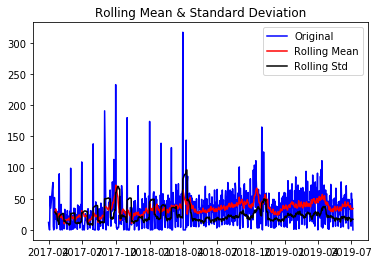

Results of Dickey-Fuller Test:
p-value = 0.0174. The series is likely non-stationary.
Test Statistic                  -3.246552
p-value                          0.017443
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8196.716, BIC=8206.098, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7984.108, BIC=7998.180, Fit time=0.300 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7670.834, BIC=7684.907, Fit time=0.349 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8194.716, BIC=8199.407, Fit time=0.031 seconds
Fit ARIMA: order=(2

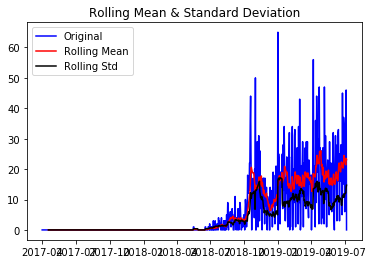

Results of Dickey-Fuller Test:
p-value = 0.8830. The series is likely non-stationary.
Test Statistic                  -0.544635
p-value                          0.883008
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5815.647, BIC=5825.029, Fit time=0.048 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5603.787, BIC=5617.859, Fit time=0.300 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5318.480, BIC=5332.552, Fit time=0.359 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5813.647, BIC=5818.338, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5320.457, BIC=5339.221, Fit time=0.480 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5320.455, 

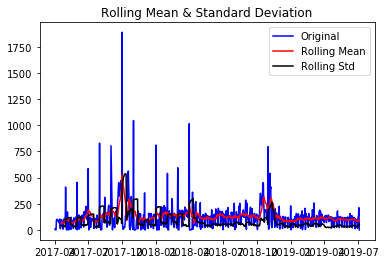

Results of Dickey-Fuller Test:
p-value = 0.0006. The series is likely stationary.
Test Statistic                  -4.205855
p-value                          0.000644
#Lags Used                      16.000000
Number of Observations Used    789.000000
Critical Value (1%)             -3.438665
Critical Value (5%)             -2.865210
Critical Value (10%)            -2.568724
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10091.652, BIC=10101.036, Fit time=0.030 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10049.134, BIC=10063.210, Fit time=0.091 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=10057.189, BIC=10071.266, Fit time=0.598 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10670.598, BIC=10675.291, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=10043.313, BIC=10062.082, Fit time=0.166 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1004

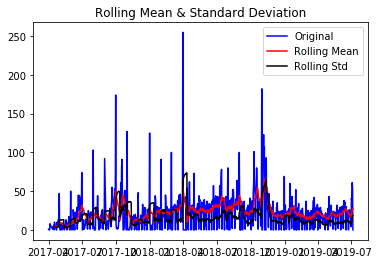

Results of Dickey-Fuller Test:
p-value = 0.0052. The series is likely stationary.
Test Statistic                  -3.631950
p-value                          0.005179
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7612.510, BIC=7621.891, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7440.954, BIC=7455.027, Fit time=0.437 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7219.460, BIC=7233.532, Fit time=0.380 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7610.510, BIC=7615.200, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7205.068, BIC=7223.831, Fit time=0.639 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7206.150, BIC=

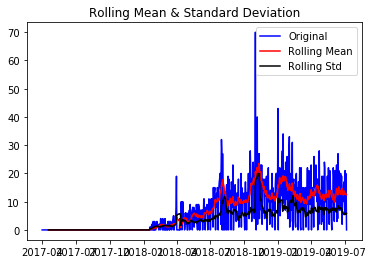

Results of Dickey-Fuller Test:
p-value = 0.5965. The series is likely non-stationary.
Test Statistic                  -1.370079
p-value                          0.596533
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5631.848, BIC=5641.230, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5413.695, BIC=5427.767, Fit time=0.225 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5083.157, BIC=5097.229, Fit time=0.363 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5629.848, BIC=5634.539, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5081.160, BIC=5099.923, Fit time=0.424 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5073.065, 

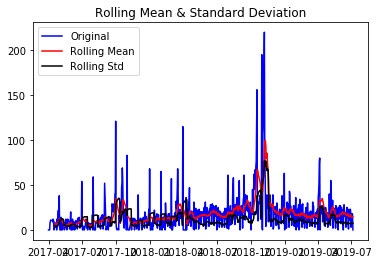

Results of Dickey-Fuller Test:
p-value = 0.0489. The series is likely non-stationary.
Test Statistic                  -2.870710
p-value                          0.048862
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7114.689, BIC=7124.071, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7003.765, BIC=7017.838, Fit time=0.272 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6902.427, BIC=6916.500, Fit time=0.286 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7112.689, BIC=7117.380, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6850.786, BIC=6869.549, Fit time=0.517 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6849.982, 

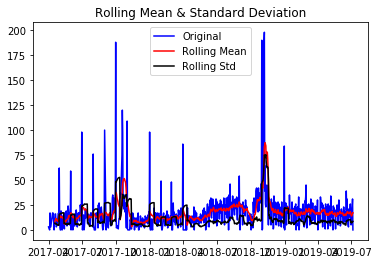

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.304069e+00
p-value                        3.356933e-08
#Lags Used                     7.000000e+00
Number of Observations Used    7.980000e+02
Critical Value (1%)           -3.438571e+00
Critical Value (5%)           -2.865169e+00
Critical Value (10%)          -2.568702e+00
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7199.420, BIC=7208.802, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7050.129, BIC=7064.201, Fit time=0.320 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6905.882, BIC=6919.955, Fit time=0.348 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7197.420, BIC=7202.111, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6882.121, BIC=6900.885, Fit time=0.658 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

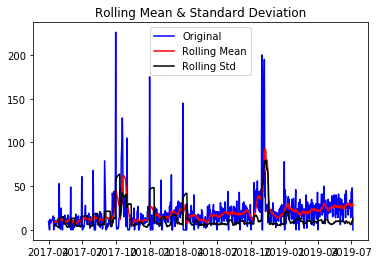

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.955169e+00
p-value                        9.469729e-10
#Lags Used                     7.000000e+00
Number of Observations Used    7.980000e+02
Critical Value (1%)           -3.438571e+00
Critical Value (5%)           -2.865169e+00
Critical Value (10%)          -2.568702e+00
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7380.835, BIC=7390.217, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7212.726, BIC=7226.799, Fit time=0.299 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7086.754, BIC=7100.827, Fit time=0.315 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7378.836, BIC=7383.526, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7066.259, BIC=7085.022, Fit time=0.506 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

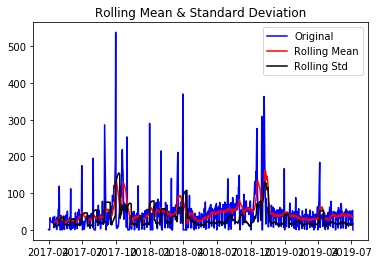

Results of Dickey-Fuller Test:
p-value = 0.0089. The series is likely stationary.
Test Statistic                  -3.465692
p-value                          0.008913
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8486.480, BIC=8495.864, Fit time=0.058 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8356.883, BIC=8370.959, Fit time=0.250 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=8390.093, BIC=8404.169, Fit time=0.600 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=9040.999, BIC=9045.692, Fit time=0.025 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8345.399, BIC=8364.168, Fit time=0.403 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=8344.106, BIC=

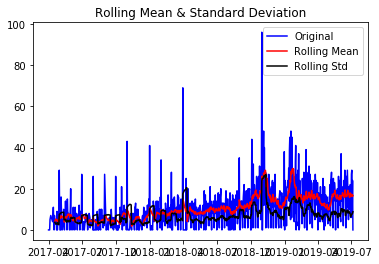

Results of Dickey-Fuller Test:
p-value = 0.1486. The series is likely non-stationary.
Test Statistic                  -2.376047
p-value                          0.148611
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6270.674, BIC=6280.056, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6053.585, BIC=6067.657, Fit time=0.242 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5744.405, BIC=5758.477, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6268.674, BIC=6273.365, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5746.291, BIC=5765.055, Fit time=0.566 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5746.281, 

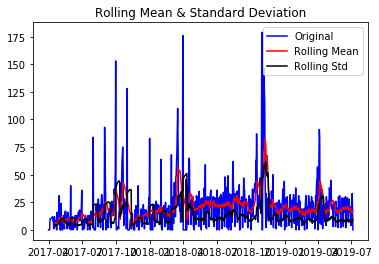

Results of Dickey-Fuller Test:
p-value = 0.0022. The series is likely stationary.
Test Statistic                  -3.884122
p-value                          0.002155
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7250.521, BIC=7259.903, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7110.449, BIC=7124.522, Fit time=0.271 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6988.197, BIC=7002.269, Fit time=0.283 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7248.521, BIC=7253.212, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6946.725, BIC=6965.488, Fit time=0.627 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6942.179, BIC=

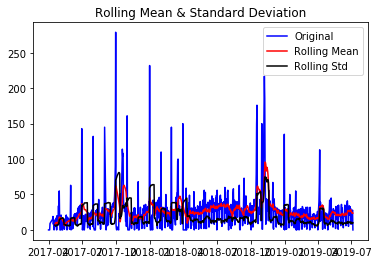

Results of Dickey-Fuller Test:
p-value = 0.0034. The series is likely stationary.
Test Statistic                  -3.759181
p-value                          0.003354
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7837.207, BIC=7846.588, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7679.269, BIC=7693.341, Fit time=0.287 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7528.923, BIC=7542.996, Fit time=0.323 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7835.207, BIC=7839.897, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7490.775, BIC=7509.538, Fit time=0.555 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7487.357, BIC=

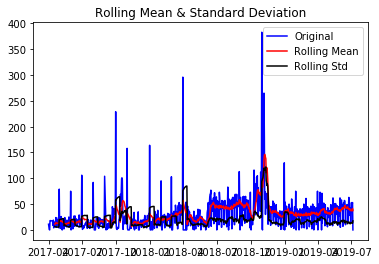

Results of Dickey-Fuller Test:
p-value = 0.0006. The series is likely stationary.
Test Statistic                  -4.208225
p-value                          0.000638
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8096.525, BIC=8105.906, Fit time=0.071 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7907.985, BIC=7922.057, Fit time=0.265 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7705.100, BIC=7719.173, Fit time=0.274 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8094.525, BIC=8099.215, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7702.520, BIC=7721.284, Fit time=0.577 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7704.086, BIC=

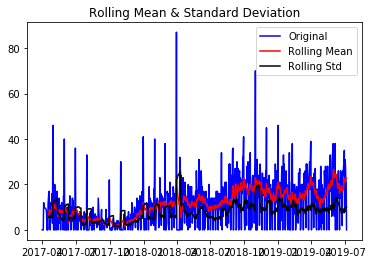

Results of Dickey-Fuller Test:
p-value = 0.6466. The series is likely non-stationary.
Test Statistic                  -1.261535
p-value                          0.646581
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6340.193, BIC=6349.575, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6175.121, BIC=6189.194, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5864.572, BIC=5878.644, Fit time=0.394 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6338.193, BIC=6342.884, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5863.713, BIC=5882.476, Fit time=0.531 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5861.968, 

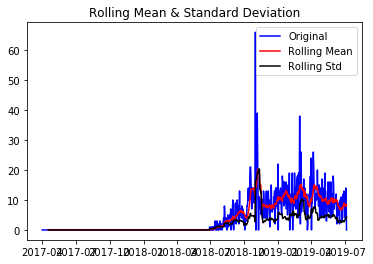

Results of Dickey-Fuller Test:
p-value = 0.5100. The series is likely non-stationary.
Test Statistic                  -1.547357
p-value                          0.509968
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4875.395, BIC=4884.776, Fit time=0.071 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4764.777, BIC=4778.850, Fit time=0.203 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4507.067, BIC=4521.140, Fit time=0.270 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4873.395, BIC=4878.086, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4497.097, BIC=4515.860, Fit time=0.476 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4484.801, 

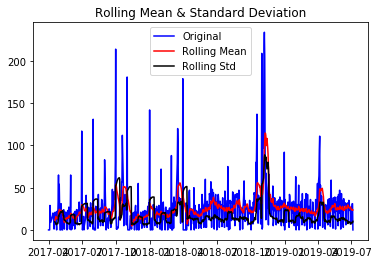

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.579015
p-value                          0.000001
#Lags Used                      14.000000
Number of Observations Used    791.000000
Critical Value (1%)             -3.438644
Critical Value (5%)             -2.865201
Critical Value (10%)            -2.568719
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7670.328, BIC=7679.710, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7539.232, BIC=7553.305, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7417.267, BIC=7431.339, Fit time=0.285 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7668.328, BIC=7673.019, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7375.281, BIC=7394.044, Fit time=0.651 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7371.988, BIC=

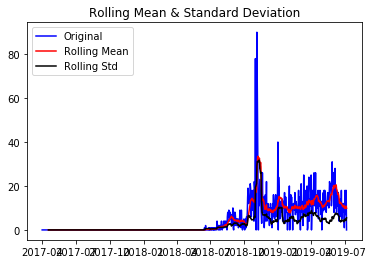

Results of Dickey-Fuller Test:
p-value = 0.1419. The series is likely non-stationary.
Test Statistic                  -2.399394
p-value                          0.141908
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5322.027, BIC=5331.409, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5220.774, BIC=5234.846, Fit time=0.337 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5039.902, BIC=5053.975, Fit time=0.235 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5320.027, BIC=5324.718, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5018.605, BIC=5037.369, Fit time=0.537 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5015.297, 

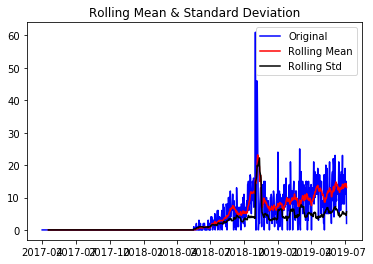

Results of Dickey-Fuller Test:
p-value = 0.5090. The series is likely non-stationary.
Test Statistic                  -1.549268
p-value                          0.509014
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4986.408, BIC=4995.790, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4838.568, BIC=4852.641, Fit time=0.191 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4595.563, BIC=4609.636, Fit time=0.273 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4984.408, BIC=4989.099, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4589.483, BIC=4608.246, Fit time=0.452 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4589.136, 

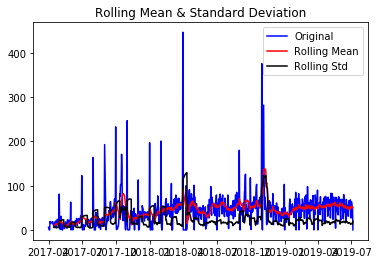

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                  -4.810756
p-value                          0.000052
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8371.662, BIC=8381.043, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8233.152, BIC=8247.224, Fit time=0.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8003.843, BIC=8017.916, Fit time=0.305 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8369.662, BIC=8374.353, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7982.673, BIC=8001.436, Fit time=0.648 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7984.598, BIC=

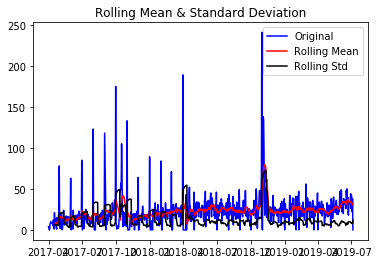

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.099273e+00
p-value                        1.313176e-12
#Lags Used                     5.000000e+00
Number of Observations Used    8.000000e+02
Critical Value (1%)           -3.438551e+00
Critical Value (5%)           -2.865160e+00
Critical Value (10%)          -2.568697e+00
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7433.000, BIC=7442.382, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7264.252, BIC=7278.324, Fit time=0.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7019.727, BIC=7033.800, Fit time=0.307 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7431.000, BIC=7435.691, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7011.733, BIC=7030.496, Fit time=0.694 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

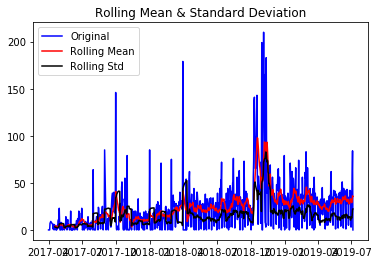

Results of Dickey-Fuller Test:
p-value = 0.1128. The series is likely non-stationary.
Test Statistic                  -2.511002
p-value                          0.112820
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7559.558, BIC=7568.940, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7412.998, BIC=7427.070, Fit time=0.286 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7248.039, BIC=7262.112, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7557.558, BIC=7562.249, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7218.706, BIC=7237.470, Fit time=0.575 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7219.175, 

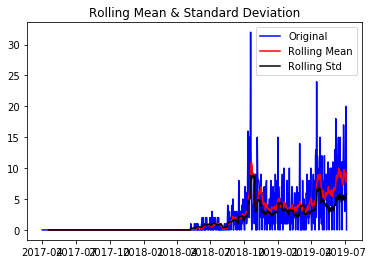

Results of Dickey-Fuller Test:
p-value = 0.8685. The series is likely non-stationary.
Test Statistic                  -0.610744
p-value                          0.868536
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4331.522, BIC=4340.904, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4068.579, BIC=4082.652, Fit time=0.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3861.524, BIC=3875.596, Fit time=0.343 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4329.522, BIC=4334.213, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3863.258, BIC=3882.022, Fit time=0.479 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=3863.306, 

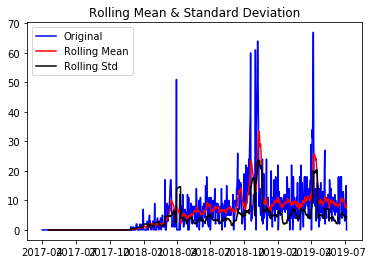

Results of Dickey-Fuller Test:
p-value = 0.1725. The series is likely non-stationary.
Test Statistic                  -2.298261
p-value                          0.172530
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5396.136, BIC=5405.518, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5304.250, BIC=5318.323, Fit time=0.211 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5228.078, BIC=5242.151, Fit time=0.231 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5394.136, BIC=5398.827, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5161.912, BIC=5180.675, Fit time=0.580 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5160.193, 

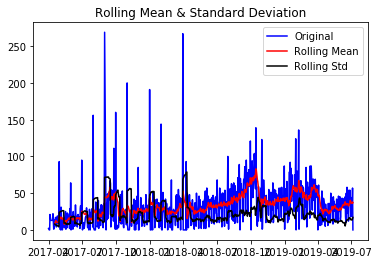

Results of Dickey-Fuller Test:
p-value = 0.0516. The series is likely non-stationary.
Test Statistic                  -2.849153
p-value                          0.051588
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8042.324, BIC=8051.706, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7832.843, BIC=7846.915, Fit time=0.278 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7541.164, BIC=7555.236, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8040.324, BIC=8045.015, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7543.109, BIC=7561.872, Fit time=0.653 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=7543.105, 

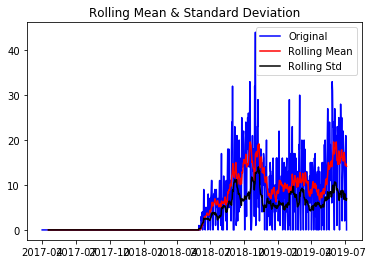

Results of Dickey-Fuller Test:
p-value = 0.8646. The series is likely non-stationary.
Test Statistic                  -0.627770
p-value                          0.864583
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5274.421, BIC=5283.803, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5157.856, BIC=5171.929, Fit time=0.362 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4905.062, BIC=4919.135, Fit time=0.311 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5272.421, BIC=5277.112, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4890.302, BIC=4909.066, Fit time=0.462 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4885.672, 

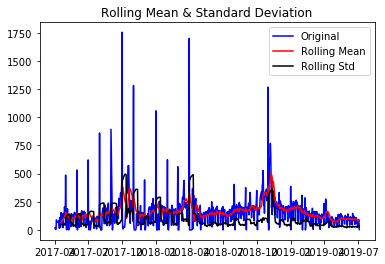

Results of Dickey-Fuller Test:
p-value = 0.0013. The series is likely stationary.
Test Statistic                  -4.027686
p-value                          0.001272
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10689.810, BIC=10699.191, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10511.421, BIC=10525.494, Fit time=0.128 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=10264.430, BIC=10278.503, Fit time=0.364 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=10687.810, BIC=10692.501, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=10259.895, BIC=10278.658, Fit time=0.607 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1026

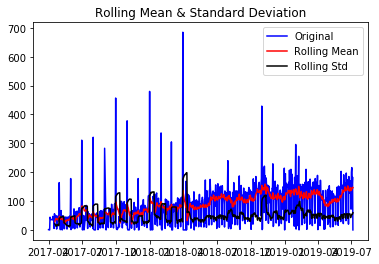

Results of Dickey-Fuller Test:
p-value = 0.4368. The series is likely non-stationary.
Test Statistic                  -1.689061
p-value                          0.436757
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9448.575, BIC=9457.957, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9233.661, BIC=9247.733, Fit time=0.275 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8885.683, BIC=8899.755, Fit time=0.954 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=9446.575, BIC=9451.266, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8887.071, BIC=8905.834, Fit time=1.316 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=8889.447, 

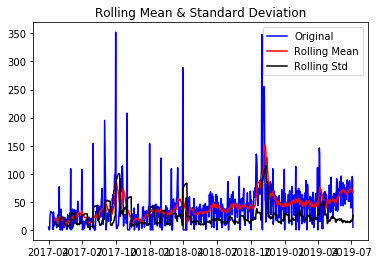

Results of Dickey-Fuller Test:
p-value = 0.0129. The series is likely non-stationary.
Test Statistic                  -3.347971
p-value                          0.012866
#Lags Used                      16.000000
Number of Observations Used    789.000000
Critical Value (1%)             -3.438665
Critical Value (5%)             -2.865210
Critical Value (10%)            -2.568724
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8225.801, BIC=8235.183, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8069.647, BIC=8083.720, Fit time=0.305 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7885.819, BIC=7899.892, Fit time=0.280 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8223.801, BIC=8228.492, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7867.036, BIC=7885.800, Fit time=0.475 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7868.158, 

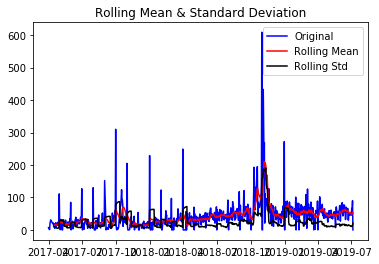

Results of Dickey-Fuller Test:
p-value = 0.0146. The series is likely non-stationary.
Test Statistic                  -3.306687
p-value                          0.014582
#Lags Used                      16.000000
Number of Observations Used    789.000000
Critical Value (1%)             -3.438665
Critical Value (5%)             -2.865210
Critical Value (10%)            -2.568724
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8523.008, BIC=8532.390, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8378.986, BIC=8393.059, Fit time=0.352 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8165.324, BIC=8179.397, Fit time=0.251 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=8521.008, BIC=8525.699, Fit time=0.054 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8156.558, BIC=8175.321, Fit time=0.618 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=8157.406, 

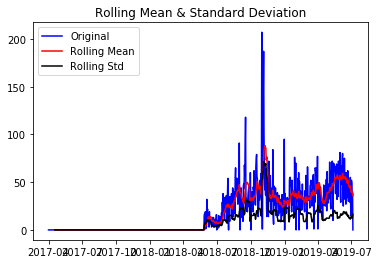

Results of Dickey-Fuller Test:
p-value = 0.6085. The series is likely non-stationary.
Test Statistic                  -1.344756
p-value                          0.608456
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7026.049, BIC=7035.431, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6867.009, BIC=6881.082, Fit time=0.261 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6662.452, BIC=6676.524, Fit time=0.282 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7024.049, BIC=7028.740, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6656.098, BIC=6674.862, Fit time=0.521 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6658.018, 

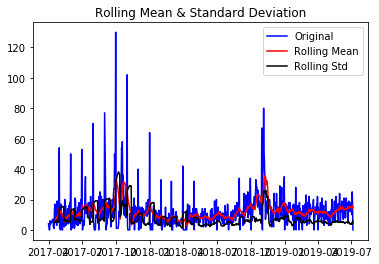

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.040701e+01
p-value                        1.845539e-18
#Lags Used                     3.000000e+00
Number of Observations Used    8.020000e+02
Critical Value (1%)           -3.438530e+00
Critical Value (5%)           -2.865151e+00
Critical Value (10%)          -2.568693e+00
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6152.622, BIC=6162.007, Fit time=0.050 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6096.323, BIC=6110.400, Fit time=0.258 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=6110.768, BIC=6124.844, Fit time=0.370 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6789.525, BIC=6794.218, Fit time=0.019 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=6078.886, BIC=6097.654, Fit time=0.459 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=

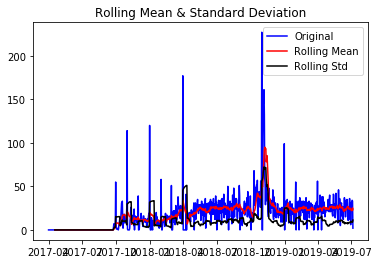

Results of Dickey-Fuller Test:
p-value = 0.0004. The series is likely stationary.
Test Statistic                  -4.352734
p-value                          0.000360
#Lags Used                       6.000000
Number of Observations Used    799.000000
Critical Value (1%)             -3.438561
Critical Value (5%)             -2.865164
Critical Value (10%)            -2.568700
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7141.185, BIC=7150.567, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6972.581, BIC=6986.654, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6760.972, BIC=6775.045, Fit time=0.275 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7139.185, BIC=7143.876, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6758.191, BIC=6776.955, Fit time=0.450 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6759.817, BIC=

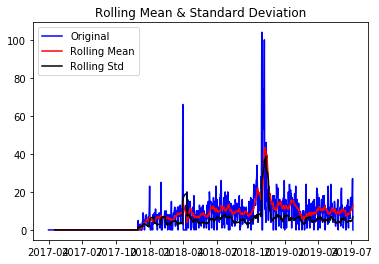

Results of Dickey-Fuller Test:
p-value = 0.1804. The series is likely non-stationary.
Test Statistic                  -2.274236
p-value                          0.180412
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5905.173, BIC=5914.555, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5711.813, BIC=5725.885, Fit time=0.249 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5518.029, BIC=5532.101, Fit time=0.253 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5903.173, BIC=5907.864, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5515.182, BIC=5533.946, Fit time=0.436 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5516.086, 

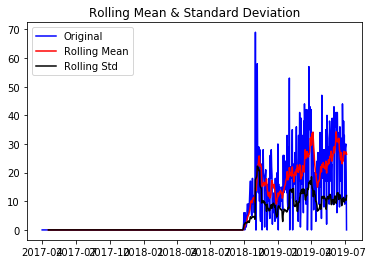

Results of Dickey-Fuller Test:
p-value = 0.8816. The series is likely non-stationary.
Test Statistic                  -0.551505
p-value                          0.881568
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5815.947, BIC=5825.329, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5604.503, BIC=5618.576, Fit time=0.234 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5347.401, BIC=5361.473, Fit time=0.363 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5813.947, BIC=5818.638, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5349.377, BIC=5368.141, Fit time=0.497 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5349.375, 

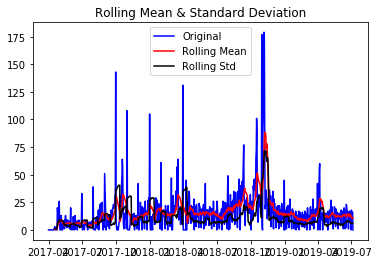

Results of Dickey-Fuller Test:
p-value = 0.0202. The series is likely non-stationary.
Test Statistic                  -3.196664
p-value                          0.020179
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7044.927, BIC=7054.309, Fit time=0.055 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6920.707, BIC=6934.779, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6820.309, BIC=6834.382, Fit time=0.287 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7042.927, BIC=7047.618, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6769.093, BIC=6787.857, Fit time=0.477 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6766.126, 

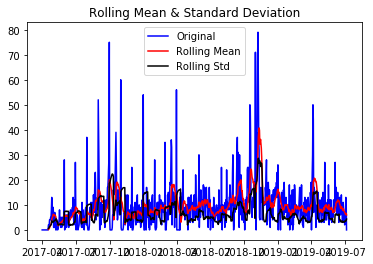

Results of Dickey-Fuller Test:
p-value = 0.0021. The series is likely stationary.
Test Statistic                  -3.888074
p-value                          0.002124
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6033.127, BIC=6042.509, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5900.054, BIC=5914.126, Fit time=0.227 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5800.164, BIC=5814.236, Fit time=0.344 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6031.127, BIC=6035.818, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5748.177, BIC=5766.941, Fit time=0.542 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5741.959, BIC=

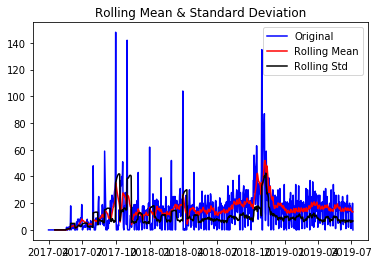

Results of Dickey-Fuller Test:
p-value = 0.0457. The series is likely non-stationary.
Test Statistic                  -2.897221
p-value                          0.045672
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6843.548, BIC=6852.930, Fit time=0.055 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6703.869, BIC=6717.941, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6461.362, BIC=6475.434, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6841.548, BIC=6846.239, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6448.241, BIC=6467.005, Fit time=0.507 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6448.739, 

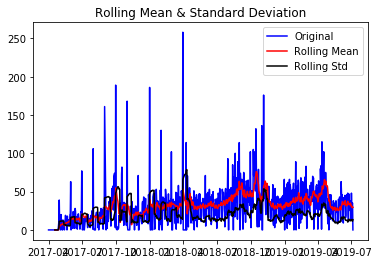

Results of Dickey-Fuller Test:
p-value = 0.0235. The series is likely non-stationary.
Test Statistic                  -3.143280
p-value                          0.023512
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7950.344, BIC=7959.726, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7775.503, BIC=7789.575, Fit time=0.285 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7473.314, BIC=7487.387, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=7948.344, BIC=7953.035, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7473.282, BIC=7492.046, Fit time=0.681 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=7472.676, 

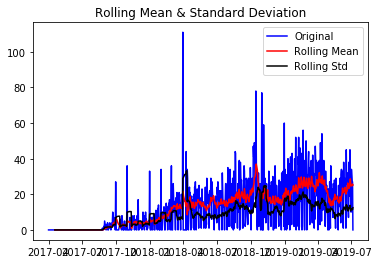

Results of Dickey-Fuller Test:
p-value = 0.6093. The series is likely non-stationary.
Test Statistic                  -1.343005
p-value                          0.609275
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6686.935, BIC=6696.317, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6510.146, BIC=6524.219, Fit time=0.214 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6176.808, BIC=6190.881, Fit time=0.375 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6684.935, BIC=6689.626, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6178.469, BIC=6197.233, Fit time=0.645 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6178.399, 

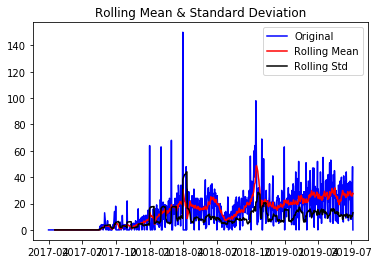

Results of Dickey-Fuller Test:
p-value = 0.4238. The series is likely non-stationary.
Test Statistic                  -1.714217
p-value                          0.423803
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6697.032, BIC=6706.413, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6494.522, BIC=6508.594, Fit time=0.253 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6212.944, BIC=6227.016, Fit time=0.278 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6695.032, BIC=6699.722, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6214.780, BIC=6233.544, Fit time=0.501 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6214.768, 

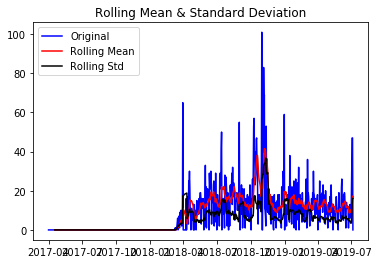

Results of Dickey-Fuller Test:
p-value = 0.4193. The series is likely non-stationary.
Test Statistic                  -1.723008
p-value                          0.419299
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6086.954, BIC=6096.336, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5927.783, BIC=5941.855, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5775.360, BIC=5789.432, Fit time=0.240 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6084.954, BIC=6089.645, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5751.197, BIC=5769.960, Fit time=0.505 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5748.874, 

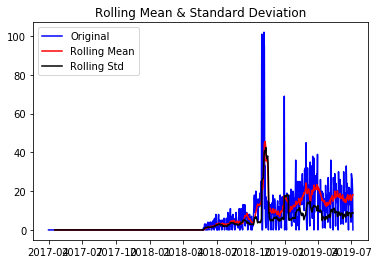

Results of Dickey-Fuller Test:
p-value = 0.0784. The series is likely non-stationary.
Test Statistic                  -2.675242
p-value                          0.078421
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5912.702, BIC=5922.084, Fit time=0.075 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5766.565, BIC=5780.638, Fit time=0.242 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5623.142, BIC=5637.215, Fit time=0.246 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5910.702, BIC=5915.393, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5599.810, BIC=5618.574, Fit time=0.449 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5598.749, 

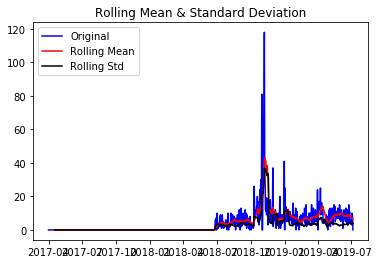

Results of Dickey-Fuller Test:
p-value = 0.0026. The series is likely stationary.
Test Statistic                  -3.835415
p-value                          0.002565
#Lags Used                      12.000000
Number of Observations Used    793.000000
Critical Value (1%)             -3.438623
Critical Value (5%)             -2.865192
Critical Value (10%)            -2.568714
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5398.785, BIC=5408.167, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5230.558, BIC=5244.630, Fit time=0.194 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5161.458, BIC=5175.531, Fit time=0.223 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5396.785, BIC=5401.476, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5145.130, BIC=5163.894, Fit time=0.449 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5127.843, BIC=

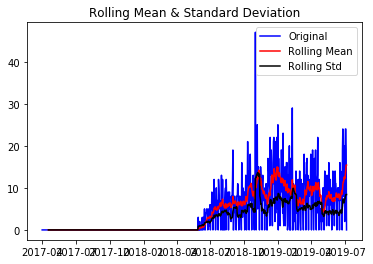

Results of Dickey-Fuller Test:
p-value = 0.8854. The series is likely non-stationary.
Test Statistic                  -0.532901
p-value                          0.885435
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5085.316, BIC=5094.698, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4897.811, BIC=4911.884, Fit time=0.199 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4597.122, BIC=4611.194, Fit time=0.338 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5083.316, BIC=5088.007, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4599.011, BIC=4617.774, Fit time=0.455 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4598.993, 

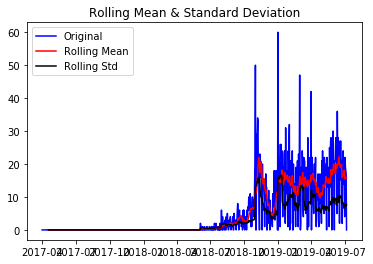

Results of Dickey-Fuller Test:
p-value = 0.6387. The series is likely non-stationary.
Test Statistic                  -1.279010
p-value                          0.638720
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5516.881, BIC=5526.263, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5282.326, BIC=5296.399, Fit time=0.232 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5007.733, BIC=5021.805, Fit time=0.378 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5514.881, BIC=5519.572, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5007.263, BIC=5026.027, Fit time=0.413 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5007.117, 

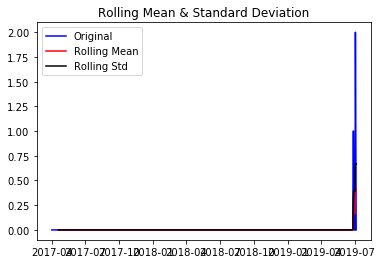

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                  25.063340
p-value                          1.000000
#Lags Used                       7.000000
Number of Observations Used    798.000000
Critical Value (1%)             -3.438571
Critical Value (5%)             -2.865169
Critical Value (10%)            -2.568702
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1423.687, BIC=-1414.305, Fit time=0.287 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1436.173, BIC=-1422.101, Fit time=0.365 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1659.362, BIC=-1645.289, Fit time=0.457 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1425.687, BIC=-1420.996, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1703.216, BIC=-1684.453, Fit time=1.471 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

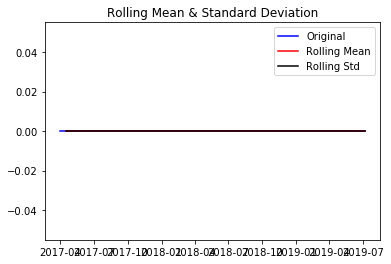

Results of Dickey-Fuller Test:
p-value = nan. The series is likely non-stationary.
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    805.000000
Critical Value (1%)             -3.438499
Critical Value (5%)             -2.865137
Critical Value (10%)            -2.568685
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-17763.410, BIC=-17754.026, Fit time=0.426 seconds
Total fit time: 0.426 seconds


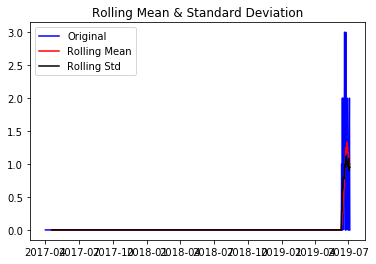

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                  35.662096
p-value                          1.000000
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=113.495, BIC=122.877, Fit time=0.212 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-333.840, BIC=-319.767, Fit time=0.343 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-492.559, BIC=-478.486, Fit time=0.453 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=111.495, BIC=116.186, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-621.224, BIC=-602.460, Fit time=0.938 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-678.338, BIC=

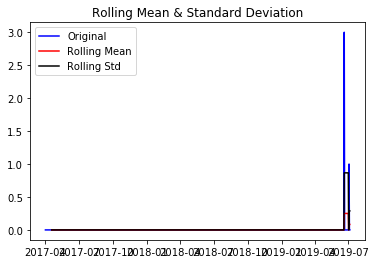

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.291044
p-value                          0.000006
#Lags Used                      12.000000
Number of Observations Used    793.000000
Critical Value (1%)             -3.438623
Critical Value (5%)             -2.865192
Critical Value (10%)            -2.568714
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-686.073, BIC=-676.691, Fit time=0.313 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-915.369, BIC=-901.296, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1243.899, BIC=-1229.827, Fit time=0.884 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-688.073, BIC=-683.382, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1242.429, BIC=-1223.666, Fit time=1.283 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-1242.463,

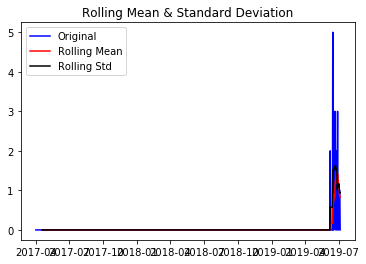

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                  12.903921
p-value                          1.000000
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=625.466, BIC=634.848, Fit time=0.223 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=267.152, BIC=281.224, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=61.365, BIC=75.438, Fit time=0.468 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=623.466, BIC=628.157, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=31.898, BIC=50.661, Fit time=0.912 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=138.100, BIC=161.554, Fi

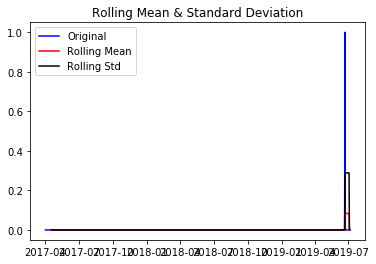

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -28.372522
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    805.000000
Critical Value (1%)             -3.438499
Critical Value (5%)             -2.865137
Critical Value (10%)            -2.568685
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-3103.491, BIC=-3094.107, Fit time=0.301 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-3101.492, BIC=-3087.416, Fit time=0.241 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-3101.492, BIC=-3087.416, Fit time=0.952 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-3104.491, BIC=-3099.798, Fit time=0.103 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-3099.492, BIC=-3080.724, Fit time=1.161 seconds
Total fit time: 2.768 seconds


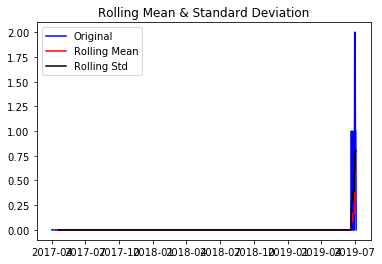

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                   6.858070
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    793.000000
Critical Value (1%)             -3.438623
Critical Value (5%)             -2.865192
Critical Value (10%)            -2.568714
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1244.056, BIC=-1234.674, Fit time=0.225 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1278.608, BIC=-1264.535, Fit time=0.382 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1355.338, BIC=-1341.265, Fit time=0.497 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1246.056, BIC=-1241.365, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1440.340, BIC=-1421.577, Fit time=1.176 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=

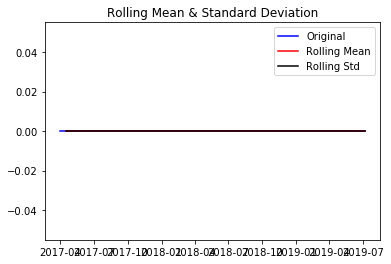

Results of Dickey-Fuller Test:
p-value = nan. The series is likely non-stationary.
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    805.000000
Critical Value (1%)             -3.438499
Critical Value (5%)             -2.865137
Critical Value (10%)            -2.568685
dtype: float64
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-17763.410, BIC=-17754.026, Fit time=0.468 seconds
Total fit time: 0.469 seconds


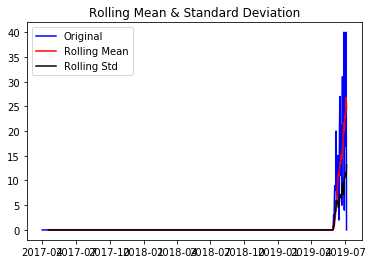

Results of Dickey-Fuller Test:
p-value = 0.2456. The series is likely non-stationary.
Test Statistic                  -2.097414
p-value                          0.245556
#Lags Used                      21.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4017.981, BIC=4027.362, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=3802.504, BIC=3816.576, Fit time=0.131 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3545.849, BIC=3559.921, Fit time=0.241 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4015.981, BIC=4020.672, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3489.463, BIC=3508.227, Fit time=1.415 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3347.562, 

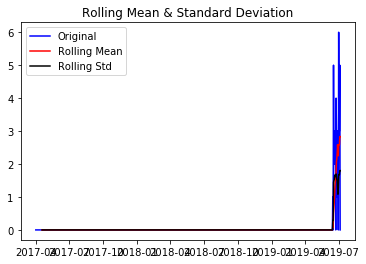

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                  45.881778
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=935.924, BIC=945.306, Fit time=0.211 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=612.514, BIC=626.586, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=445.426, BIC=459.499, Fit time=0.399 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=933.924, BIC=938.615, Fit time=0.107 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=378.954, BIC=397.718, Fit time=0.591 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=319.735, BIC=343.189

In [98]:
#Loop for multiple branch_id selection segment 1
col_list=df_seg_1_piv.columns.values
for i in col_list:
    ts_seg1=df_seg_1_piv[i]
    test_stationarity(ts_seg1)
    fit_value=model_arima_seg_1(ts_seg1)
    df_seg1_ts[i]=fit_value

In [125]:
seg_1_sum=df_seg1_ts

In [195]:
seg_1_rou=np.round(seg_1_sum)
seg_1_rou

,1,5,7,3,8,9,10,11,13,14,...,262,263,264,265,266,267,268,269,270,271
2019-07-06,137.0,212.0,37.0,219.0,36.0,36.0,44.0,45.0,38.0,32.0,...,-0.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,32.0,4.0
2019-07-07,145.0,212.0,44.0,239.0,39.0,38.0,44.0,45.0,39.0,54.0,...,0.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,35.0,1.0
2019-07-08,141.0,212.0,38.0,241.0,39.0,38.0,45.0,45.0,43.0,39.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,15.0,2.0
2019-07-09,154.0,212.0,43.0,241.0,39.0,38.0,45.0,45.0,39.0,54.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,21.0,2.0
2019-07-10,156.0,213.0,39.0,242.0,39.0,38.0,45.0,45.0,37.0,40.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,33.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,160.0,224.0,43.0,260.0,40.0,40.0,48.0,48.0,43.0,51.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,27.0,2.0
2019-09-27,160.0,224.0,43.0,260.0,40.0,40.0,48.0,48.0,43.0,51.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,27.0,2.0
2019-09-28,160.0,224.0,43.0,260.0,40.0,40.0,48.0,48.0,43.0,51.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,27.0,2.0
2019-09-29,160.0,224.0,43.0,261.0,40.0,40.0,48.0,48.0,43.0,52.0,...,1.0,-0.0,1.0,0.0,1.0,0.0,1.0,-0.0,27.0,2.0


In [196]:
fair_seg1=pd.DataFrame(columns={'application_date','segment','case_count'})
fair_seg1['application_date']=df_seg1_ts.index
fair_seg1['segment']=1

In [197]:
fair_seg1

,case_count,application_date,segment
0,NaN,2019-07-06,1
1,NaN,2019-07-07,1
2,NaN,2019-07-08,1
3,NaN,2019-07-09,1
4,NaN,2019-07-10,1
...,...,...,...
82,NaN,2019-09-26,1
83,NaN,2019-09-27,1
84,NaN,2019-09-28,1
85,NaN,2019-09-29,1


In [198]:
k=0
for i in seg_1_rou.index:
    temp=0
    for j in seg_1_rou.columns:
        temp=temp+seg_1_rou.loc[i,j]
    fair_seg1.case_count[k]=temp
    k=k+1

In [199]:
fair_seg1

,case_count,application_date,segment
0,2825,2019-07-06,1
1,3041,2019-07-07,1
2,3068,2019-07-08,1
3,3106,2019-07-09,1
4,3119,2019-07-10,1
...,...,...,...
82,3343,2019-09-26,1
83,3337,2019-09-27,1
84,3350,2019-09-28,1
85,3342,2019-09-29,1


In [200]:
fair_seg1.to_csv("data_seg1_test.csv")

In [115]:
#Handling Segment 2
df_seg_2_piv=df_seg_2.pivot_table('case_count',index='application_date',columns='state')

In [116]:
df_seg_2_piv

state,ASSAM,BIHAR,CHHATTISGARH,GUJARAT,HARYANA,JHARKHAND,KARNATAKA,KERALA,MADHYA PRADESH,MAHARASHTRA,ORISSA,PUNJAB,TAMIL NADU,TRIPURA,UTTAR PRADESH,WEST BENGAL
application_date,,,,,,,,,,,,,,,,
2017-04-01,0.0,0.0,34.0,0.0,0.0,0.0,165.0,23.0,36.0,0.0,111.0,0.0,458.0,0.0,27.0,43.0
2017-04-02,0.0,0.0,37.0,5.0,0.0,0.0,89.0,6.0,0.0,0.0,148.0,0.0,182.0,0.0,22.0,116.0
2017-04-03,0.0,0.0,45.0,9.0,0.0,0.0,203.0,152.0,28.0,0.0,233.0,0.0,1161.0,0.0,7.0,178.0
2017-04-04,0.0,0.0,109.0,7.0,0.0,0.0,398.0,146.0,85.0,0.0,276.0,0.0,881.0,0.0,20.0,323.0
2017-04-05,0.0,0.0,97.0,44.0,0.0,0.0,250.0,173.0,0.0,0.0,227.0,0.0,1142.0,0.0,39.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19,1383.0,6285.0,493.0,566.0,0.0,459.0,3930.0,1457.0,1588.0,459.0,1481.0,0.0,9046.0,124.0,621.0,1886.0
2019-07-20,986.0,5686.0,372.0,495.0,0.0,340.0,3454.0,1208.0,1346.0,558.0,1112.0,0.0,8516.0,108.0,462.0,1480.0
2019-07-21,295.0,2982.0,231.0,20.0,0.0,124.0,1622.0,115.0,456.0,254.0,787.0,0.0,3862.0,32.0,459.0,1028.0


In [118]:
df_seg2_ts=pd.DataFrame(index=pd.date_range('2019-07-24','2019-10-24'))

In [119]:
df_seg2_ts

""
2019-07-24
2019-07-25
2019-07-26
2019-07-27
2019-07-28
...
2019-10-20
2019-10-21
2019-10-22
2019-10-23


In [123]:
#Loop for multiple state selection segment 2
col_list=df_seg_2_piv.columns.values
for i in col_list:
    ts_seg2=df_seg_2_piv[i]
    #test_stationarity(ts_seg2)
    fit_value=model_arima_seg_2(ts_seg2)
    df_seg2_ts[i]=fit_value

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=12685.800, BIC=12695.274, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=12632.943, BIC=12647.154, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=12624.676, BIC=12638.887, Fit time=0.234 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=12683.810, BIC=12688.547, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=12623.812, BIC=12642.760, Fit time=0.330 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=12567.215, BIC=12590.900, Fit time=1.790 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=12629.446, BIC=12648.394, Fit time=0.151 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=12625.780, BIC=12654.201, Fit time=0.811 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=12621.571, BIC=12649.993, Fit time=1.550 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=13600.718, BIC=13610.194, Fit time=0.042 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12702.930, BIC=12717.144, Fit time=0.131 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=13066.021, BIC=13080.235, Fit time=0.868 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=14399.257, BIC=14403.995, Fit time=0.021 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12704.295, BIC=12723.248, Fit time=0.298 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=12704.298, BIC=12723.251, Fit time=0.236 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=12706.286, BIC=12729.977, Fit time=0.412 seconds
Total fit time: 2.019 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=11750.928, BIC=11760.402, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=11720.624, BIC=11734.835, Fit time=0.1

Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12629.788, BIC=12648.741, Fit time=0.241 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12624.194, BIC=12647.885, Fit time=0.284 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=12626.103, BIC=12654.532, Fit time=0.772 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=12628.583, BIC=12652.273, Fit time=0.343 seconds
Total fit time: 2.617 seconds


In [129]:
seg_2_sum=df_seg2_ts

In [140]:
seg_2_sum

,ASSAM,BIHAR,CHHATTISGARH,GUJARAT,HARYANA,JHARKHAND,KARNATAKA,KERALA,MADHYA PRADESH,MAHARASHTRA,ORISSA,PUNJAB,TAMIL NADU,TRIPURA,UTTAR PRADESH,WEST BENGAL
2019-07-24,1149.346794,5756.367783,473.861209,452.723686,-0.000004,379.502290,3260.737466,1577.493406,1443.229678,541.907290,655.569719,-0.000004,9306.642380,143.896130,480.425895,2013.790155
2019-07-25,1090.347556,5398.180131,457.389895,445.875489,-0.000004,358.649086,3176.298735,1459.828467,1444.970299,553.938161,620.439933,-0.000004,8888.656715,140.234541,478.842200,1953.248552
2019-07-26,1039.518585,5095.428206,440.253503,440.956093,-0.000004,342.279369,3107.201212,1364.677880,1446.710920,490.562384,640.270376,-0.000004,8538.905301,135.590747,477.872931,1874.586564
2019-07-27,999.907779,4839.633886,426.923564,436.867761,-0.000004,329.444859,3050.735991,1287.733683,1448.451541,509.010282,620.460102,-0.000004,8246.371546,132.148617,477.109594,1792.234387
2019-07-28,968.447342,4623.615657,415.905343,433.591977,-0.000004,319.397841,3004.664998,1225.512213,1450.192162,461.794136,612.960978,-0.000004,8001.817517,129.522429,476.555228,1717.571912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-20,927.075139,3763.663662,385.073955,432.868764,-0.000004,309.619031,2966.459944,962.550641,1596.404323,418.099053,629.223210,-0.000004,7097.456663,131.511785,504.841927,1442.832511
2019-10-21,928.096485,3767.952267,385.317641,433.040204,-0.000004,309.963817,2968.675543,962.550640,1598.144944,418.453738,629.511564,-0.000004,7102.098305,131.658510,505.230792,1442.832511
2019-10-22,929.117831,3772.240897,385.561328,433.211644,-0.000004,310.308602,2970.891143,962.550639,1599.885565,418.808424,629.799917,-0.000004,7106.739960,131.805236,505.619657,1442.832511
2019-10-23,930.139177,3776.529549,385.805015,433.383084,-0.000004,310.653387,2973.106742,962.550638,1601.626186,419.163112,630.088271,-0.000004,7111.381625,131.951961,506.008522,1442.832511


In [171]:
seg_2_rou=np.round(seg_2_sum)
seg_2_rou

,ASSAM,BIHAR,CHHATTISGARH,GUJARAT,HARYANA,JHARKHAND,KARNATAKA,KERALA,MADHYA PRADESH,MAHARASHTRA,ORISSA,PUNJAB,TAMIL NADU,TRIPURA,UTTAR PRADESH,WEST BENGAL
2019-07-24,1149.0,5756.0,474.0,453.0,-0.0,380.0,3261.0,1577.0,1443.0,542.0,656.0,-0.0,9307.0,144.0,480.0,2014.0
2019-07-25,1090.0,5398.0,457.0,446.0,-0.0,359.0,3176.0,1460.0,1445.0,554.0,620.0,-0.0,8889.0,140.0,479.0,1953.0
2019-07-26,1040.0,5095.0,440.0,441.0,-0.0,342.0,3107.0,1365.0,1447.0,491.0,640.0,-0.0,8539.0,136.0,478.0,1875.0
2019-07-27,1000.0,4840.0,427.0,437.0,-0.0,329.0,3051.0,1288.0,1448.0,509.0,620.0,-0.0,8246.0,132.0,477.0,1792.0
2019-07-28,968.0,4624.0,416.0,434.0,-0.0,319.0,3005.0,1226.0,1450.0,462.0,613.0,-0.0,8002.0,130.0,477.0,1718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-20,927.0,3764.0,385.0,433.0,-0.0,310.0,2966.0,963.0,1596.0,418.0,629.0,-0.0,7097.0,132.0,505.0,1443.0
2019-10-21,928.0,3768.0,385.0,433.0,-0.0,310.0,2969.0,963.0,1598.0,418.0,630.0,-0.0,7102.0,132.0,505.0,1443.0
2019-10-22,929.0,3772.0,386.0,433.0,-0.0,310.0,2971.0,963.0,1600.0,419.0,630.0,-0.0,7107.0,132.0,506.0,1443.0
2019-10-23,930.0,3777.0,386.0,433.0,-0.0,311.0,2973.0,963.0,1602.0,419.0,630.0,-0.0,7111.0,132.0,506.0,1443.0


In [187]:
fair_seg2=pd.DataFrame(columns={'application_date','segment','case_count'})
fair_seg2['application_date']=df_seg2_ts.index
fair_seg2['segment']=2

In [190]:
k=0
for i in seg_2_rou.index:
    temp=0
    for j in seg_2_rou.columns:
        temp=temp+seg_2_rou.loc[i,j]
    fair_seg2.case_count[k]=temp
    k=k+1

In [193]:
fair_seg2

,case_count,application_date,segment
0,27636,2019-07-24,2
1,26466,2019-07-25,2
2,25436,2019-07-26,2
3,24596,2019-07-27,2
4,23844,2019-07-28,2
...,...,...,...
88,21568,2019-10-20,2
89,21584,2019-10-21,2
90,21601,2019-10-22,2
91,21616,2019-10-23,2


In [194]:
fair_seg2.to_csv("data_seg2_test.csv")